<a href="https://colab.research.google.com/github/joshual777/PatronesProyecto3/blob/feature%2FHipotesis-1/Proyecto3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto 3 Aprendizaje no supervisado**

Integrantes: \
Jose Julian Camacho Hernandez \
Leonardo Guillén Fernandez \
Joshua Guzmán Quesada

## Feature Egineering

In [ ]:
# Librerías necesarias para el proceso de feature engineering
# de las imágenes
import os
from PIL import Image

# Script para procesar todas la imágenes del proyecto

# Se lee el directorio donde esta las carpetas que contienen
# las imágenes de los diferentes tipos de plantas tanto sanas
# como enfermas

categorias = []  # Lista para almacenar las categorías
directorio = "C:\\Users\\User\\Desktop\\XI SEMESTRE 2023\\Introducción al Reconocimiento de Patrones\\Semana 16\\Proyecto3\\Data for Identification of Plant Leaf Diseases Using a 9-layer Deep Convolutional Neural Network\\Plant_leave_diseases_dataset_without_augmentation"  # Toma el directorio actual
folders = os.listdir(directorio)  # Lista las carpetas
extension = ".JPG" # Extensión aprobada para las imágenes
target_size = (100, 100) # Dimensión a recortar la imagen

# Itera sobre el folder para obtener las categrías
for cat in folders:
    categorias.append(cat)
categorias = categorias   # Elimina el script de python

print(categorias)

# Cuenta la cantidad de imágenes en cada una de las carpetas
for cat in categorias:
    category_folder = os.listdir(directorio + "\\" + cat)
    count = 0 # Se resetea el contador
    for image in category_folder:
        # Se toma la extensión del archivo
        image_dir = os.path.splitext(directorio + "\\" + cat+"\\" + image)
        # Si la extensión del archivo no es JPG
        if image_dir[1] != extension:
            os.remove(directorio + "\\" + cat+"\\" + image) # Se elimina
        # Aquellas que no son eliminadas se recortan a un tamaño de 100x100 pixeles
        else:

            image_abrir = Image.open(directorio + "\\" + cat+"\\" + image)

            # Se toman la dimensiones de las imágenes para cortarlas
            width, height = image_abrir.size
            left = (width - target_size[0]) // 2
            upper = (height - target_size[1]) // 2
            right = left + target_size[0]
            lower = upper + target_size[1]

            # Se recorta la imagen con las indicaciones antes
            nueva_imagen = image_abrir.crop((left, upper, right, lower))
            # Se elimina la imagen de dimensión 256x256
            os.remove(directorio + "\\" + cat+"\\" + image)
            #carpeta_destino = os.path.join(directorio, cat, nueva_imagen)
            #print(cat)
            nueva_imagen.save(directorio + "\\" + cat+"\\" + image)

        count+=1

    print(cat, count)  # Se imprime la categoría y la cantidad asociada

## Experimento 1

In [ ]:
import os
import cv2
import numpy as np
import torch
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
from skimage import io, color, feature
from skimage.transform import resize
from skimage.measure import regionprops
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

# Verificar si hay una GPU disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Directorio que contiene las imágenes de las hojas
data_dir = 'test'

# Lista para almacenar las características y las etiquetas
features = []
labels = []
i = 0
# Iterate over the subfolders in the main folder
for class_folder in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_folder)
    print('Main: ', class_folder)
    if os.path.isdir(class_path):
        # Iterate over the images in each subfolder
        for folder in os.listdir(class_path):
            print(folder)
            folder_path = os.path.join(class_path, folder)
            if os.path.isdir(folder_path):
                for image_file in os.listdir(folder_path):
                    image_path = os.path.join(folder_path, image_file)
                    if image_file.endswith('.JPG'):
                        # Load the image and resize it
                        image = io.imread(image_path)
                        image = resize(image, (256, 256))
                        # Normalize pixel values between 0 and 1
                        image = image.astype(np.float32) / 255.0
                        # Convert the image to grayscale
                        gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
                        # Add the features and label to the lists
                        features.append(gray_image)
                        labels.append(i)
        i+=1

# Convertir las listas en matrices numpy
features = np.array(features)
labels = np.array(labels)

# Normalizar las características
features = normalize(features.reshape(features.shape[0], -1))

# Convertir las características y las etiquetas a tensores
features = torch.tensor(features, dtype=torch.float32)
labels = torch.tensor(labels)


# Crear un Dataset personalizado
class LeafDataset(torch.utils.data.Dataset):
    def __init__(self, features, labels, transform=None):
        self.features = features
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        feature = self.features[idx]
        label = self.labels[idx]

        if self.transform:
            feature = self.transform(feature)

        return feature, label


Main:  healthy
Strawberry___healthy
Pepper,_bell___healthy
Peach___healthy
Corn___healthy
Apple___healthy
Tomato___healthy
Grape___healthy
Potato___healthy
Cherry___healthy
Soybean___healthy
Blueberry___healthy
Raspberry___healthy
Main:  unhealthy
Apple___Cedar_apple_rust
Tomato___Early_blight
Grape___Esca_(Black_Measles)
Cherry___Powdery_mildew
Corn___Northern_Leaf_Blight
Corn___Common_rust
Tomato___Leaf_Mold
Strawberry___Leaf_scorch
Tomato___Target_Spot
Apple___Apple_scab
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Potato___Early_blight
Tomato___Bacterial_spot
Apple___Black_rot
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___Septoria_leaf_spot
Corn___Cercospora_leaf_spot Gray_leaf_spot
Tomato___Spider_mites Two-spotted_spider_mite
Squash___Powdery_mildew
Tomato___Tomato_mosaic_virus
Orange___Haunglongbing_(Citrus_greening)
Pepper,_bell___Bacterial_spot
Grape___Black_rot
Tomato___Late_blight
Potato___Late_blight
Peach___Bacterial_spot


## Primera Distribución de Datos

In [ ]:

# Dividir los datos en conjuntos de entrenamiento y prueba
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, test_size=0.2, random_state=42)

# Crear los Dataset correspondientes para entrenamiento y prueba
train_dataset = LeafDataset(train_features, train_labels)
test_dataset = LeafDataset(test_features, test_labels)
print(len(train_dataset[0][0]))
print(len(test_dataset[0][0]))
# Crear los DataLoader correspondientes para entrenamiento y prueba
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Guardar las características y las etiquetas en archivos si es necesario
#np.save('features.npy', features.numpy())
#np.save('labels.npy', labels.numpy())

65536
65536


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize, LabelBinarizer, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, auc, roc_auc_score, roc_curve, f1_score

def computeMetrics(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)        # Calcular la exactitud
    prec = precision_score(y_test, y_pred)      # Calcular la precisión
    rec = recall_score(y_test, y_pred)          # Calcular el recall
    f1 = f1_score(y_test, y_pred)               # Calcular F1 score
    auc = roc_auc_score(y_test, y_pred)         # Calcular el AUC
    # Desplegar métricas
    metrics = {"Accuracy":acc, "Precision":prec, "Recall":rec, "F1 Score":f1, "AUC":auc}
    df = pd.DataFrame(metrics, index = [0])
    display(df)
    # Calcular la curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred) # Compute the ROC curve
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve and AUC')
    plt.legend(loc="lower right")
    plt.show()


### Clasificador sin autoencoder

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

# Definir la arquitectura del MLP
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Definir los hiperparámetros del MLP
input_size = features.shape[1]  # Tamaño de entrada del MLP
print(features.shape)
hidden_size = 64  # Tamaño de la capa oculta del MLP
output_size = len(set(labels))  # Tamaño de salida del MLP (número de clases)

# Crear el modelo MLP
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
mlp = MLP(input_size, hidden_size, output_size)
mlp.to(device)  # Mover el modelo a la GPU (si está disponible)

# Definir la función de pérdida y el optimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mlp.parameters(), lr=0.001)

# Definir el número de épocas y realizar el entrenamiento
num_epochs = 10
for epoch in range(num_epochs):
    for batch_features, batch_labels in train_loader:
        # Mover los datos a la GPU (si está disponible)
        batch_features = batch_features.to(device)
        batch_labels = batch_labels.to(device)
        # Hacer forward pass
        outputs = mlp(batch_features)
        # Calcular la pérdida
        loss = criterion(outputs, batch_labels)
        # Realizar backpropagation y actualizar los pesos
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Imprimir el progreso del entrenamiento
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

# Guardar el modelo entrenado si es necesario
torch.save(mlp.state_dict(), 'mlp_model.pth')


torch.Size([660, 65536])
Epoch [1/10], Loss: 1.9338973760604858
Epoch [2/10], Loss: 0.49727684259414673
Epoch [3/10], Loss: 0.8741753101348877
Epoch [4/10], Loss: 0.5323099493980408
Epoch [5/10], Loss: 0.5762201547622681
Epoch [6/10], Loss: 0.5379816293716431
Epoch [7/10], Loss: 0.6185510754585266
Epoch [8/10], Loss: 0.584990382194519
Epoch [9/10], Loss: 0.5884742140769958
Epoch [10/10], Loss: 0.5831071734428406


Resultados esperados:  tensor([1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1])
Resultados obtenidos:  [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


,Accuracy,Precision,Recall,F1 Score,AUC
0,0.628788,0.632812,0.975904,0.767773,0.50836


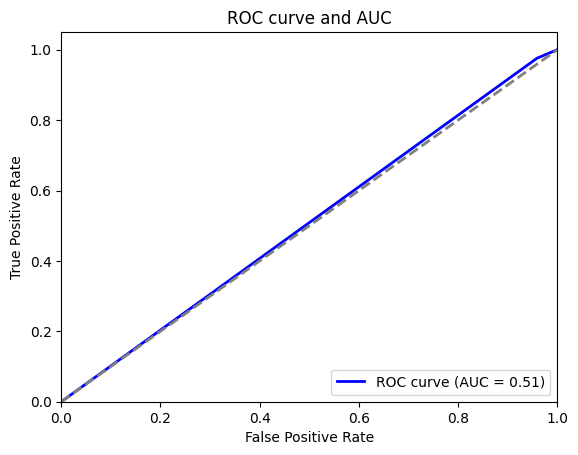

In [ ]:
import torch
from torchvision.transforms import ToTensor
import numpy as np

# Cargar el modelo entrenado
mlp = MLP(input_size, hidden_size, output_size)
mlp.load_state_dict(torch.load('mlp_model.pth'))
mlp.to(device)  # Mover el modelo a la GPU (si está disponible)
mlp.eval()  # Establecer el modo de evaluación

# Realizar predicciones en los datos de prueba
predictions = []
with torch.no_grad():
    for batch_features, batch_labels in test_loader:
        batch_features = batch_features.to(device)

        # Obtener las predicciones del modelo
        outputs = mlp(batch_features)
        _, predicted = torch.max(outputs.data, 1)

        # Guardar las predicciones
        predictions.extend(predicted.cpu().numpy())

# Calcular la exactitud (accuracy) de las predicciones
print('Resultados esperados: ', test_labels[:20])
print('Resultados obtenidos: ', predictions[:20])
computeMetrics(test_labels, predictions)


### Autoencoder

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToTensor

# Define the autoencoder architecture
class Autoencoder(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Linear(input_size, hidden_size)
        self.decoder = nn.Linear(hidden_size, input_size)

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Instantiate the autoencoder and define the loss function and optimizer
input_size = 65536
hidden_size = 64
autoencoder = Autoencoder(input_size, hidden_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

# Train the autoencoder
num_epochs = 4
for epoch in range(num_epochs):
    for batch_features, _ in train_loader:
        # Forward pass
        outputs = autoencoder(batch_features)
        # Compute the loss
        loss = criterion(outputs, batch_features)
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Print the loss for tracking training progress
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Encode the data using the autoencoder
encoded_data = []
for batch_features, _ in train_loader:
    encoded_batch = autoencoder.encoder(batch_features)
    encoded_data.append(encoded_batch)

# Concatenate the encoded data from different batches
encoded_data = torch.cat(encoded_data, dim=0)


Epoch [1/4], Loss: 0.0039
Epoch [2/4], Loss: 0.0023
Epoch [3/4], Loss: 0.0002
Epoch [4/4], Loss: 0.0000


In [ ]:
import torch
from torchvision.transforms import ToTensor
import numpy as np

# Cargar el modelo entrenado
mlp = MLP(len(encoded_data[0]), 64, 2)
mlp.to(device)  # Mover el modelo a la GPU (si está disponible)
mlp.eval()  # Establecer el modo de evaluación

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mlp.parameters(), lr=0.001)

# Train the MLP using your labeled data
num_epochs = 10
for epoch in range(num_epochs):
    for data, labels in train_loader:
        optimizer.zero_grad()
        images_flatten = data.view(data.size(0), -1)
        latent_vectors = autoencoder.encoder(images_flatten)  # Get latent vectors from autoencoder
        outputs = mlp(latent_vectors)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    # Print epoch number and loss
    print(f"Epoch: {epoch+1}, Loss: {loss.item():.4f}")

# Pass the encoded data through the MLP
predictions = mlp(encoded_data)
# Get the predicted class labels
_, predicted_labels = torch.max(predictions, dim=1)

# Calcular la exactitud (accuracy) de las predicciones
print('Resultados esperados: ', test_labels)
print('Resultados obtenidos: ', predicted_labels)
computeMetrics(test_labels, predicted_labels)


Epoch: 1, Loss: 0.6264
Epoch: 2, Loss: 0.6207
Epoch: 3, Loss: 0.7754
Epoch: 4, Loss: 0.6244
Epoch: 5, Loss: 0.6648
Epoch: 6, Loss: 0.7132
Epoch: 7, Loss: 0.6690
Epoch: 8, Loss: 0.7118
Epoch: 9, Loss: 0.5341
Epoch: 10, Loss: 0.7117
Resultados esperados:  tensor([1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
        1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
        1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1])
Resultados obtenidos:  tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

ValueError: Found input variables with inconsistent numbers of samples: [132, 528]